In [ ]:

import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

with open('/content/drive/My Drive/jobteaser/optim.csv') as csv_file:
    df1 = pd.read_csv(csv_file)
with open('/content/drive/My Drive/jobteaser/candidate_status_update.csv') as csv_file:
    df2 = pd.read_csv(csv_file)
with open('/content/drive/My Drive/jobteaser/dim_schools.csv') as csv_file:
    df3 = pd.read_csv(csv_file)


Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
'''
optin: contains all students opt-in/opt-out info. This is a toggle to activate saying that we are “looking for opportunities” and therefore agree to receive offers from companies via Shortlist product.
user_id
receive_time
cause:
manual: student manually opt-in/opt-out toggle
auto-no-answer: student doesn’t answer to a Shortlist, he is automatically opt-out
active: TRUE if it’s opt-in FALSE otherwise
school_id
current_sign_in_at: last student connection date
resume_uploaded

candidate_status_update: contains all responses from shortlisted students, as well as responses from recruiters after students have declared their interest in the offer.
user_id
receive_time: event timestamp
shortlist_id
status_update:
Student side:
awaiting: waiting for student answer
interested: student is interested in the offer and agrees to send his/her CV to the recruiter
not interested: student is not interested or did not answer
Company_side:
approved: recruiter has validated the student’s CV and begins the recruitment process
declined: recruiter is finally not interested in the student
response is optional, unlike the student who, if he or she does not respond, falls into the not interested category by default.

cause:
email-click: student or recruiter made the action
auto-timeout: after 72h of no response (student side only)
school_id: school_id of the student
current_sign_in_at: last student connection date
dim_schools: table contains all information about JT’s partner schools.
school_id
is_cc: is it the career center of the school or JT public site
intranet_school_id: in case it is a public site, here is the id of the school with career center. For example, ESSEC is a partner school with a career center. However, if I am an alumni, I will no longer have access to the career center, so I will be able to register on JT via the public site. My school_id will be the one of ESSEC on the public site, and in the intranet_school_id column, the id of the ESSEC career center will appear
jt_country: school country
jt_intranet_status: only “launched” status matters to you, and means that the school has an integrated career center via JT. Otherwise it is the public site, with statuses corresponding to the different levels of advancement of the prospects.
jt_school_type: School type
1 : Engineer Schools / TU
2 : Business Schools / Business Universities
3 : Other Universities
Other
'''

'\noptin: contains all students opt-in/opt-out info. This is a toggle to activate saying that we are “looking for opportunities” and therefore agree to receive offers from companies via Shortlist product.\nuser_id\nreceive_time\ncause:\nmanual: student manually opt-in/opt-out toggle\nauto-no-answer: student doesn’t answer to a Shortlist, he is automatically opt-out\nactive: TRUE if it’s opt-in FALSE otherwise\nschool_id\ncurrent_sign_in_at: last student connection date\nresume_uploaded\n\ncandidate_status_update: contains all responses from shortlisted students, as well as responses from recruiters after students have declared their interest in the offer.\nuser_id\nreceive_time: event timestamp\nshortlist_id\nstatus_update:\nStudent side:\nawaiting: waiting for student answer\ninterested: student is interested in the offer and agrees to send his/her CV to the recruiter\nnot interested: student is not interested or did not answer\nCompany_side:\napproved: recruiter has validated the stu

In [ ]:
df1

,user_id,receive_time,cause,active,school_id,current_sign_in_at,resume_uploaded
0,46ecd1cd-dc0c-46dd-8d1d-c2b213c1d1a5,2020-06-17 16:58:00 UTC,manual,False,007af60e-7795-462a-a7b9-ee666ff37a11,2020-06-17 16:53:00 UTC,False
1,e77c48cd-32c1-4877-8678-fd2609edd817,2020-08-12 11:52:00 UTC,manual,False,0087df51-763a-4f03-9f77-2d259b1c487a,2020-08-12 11:41:00 UTC,False
2,70f9e518-9cab-4c50-82b7-4ab239cff3e9,2020-02-16 10:39:00 UTC,manual,False,0087df51-763a-4f03-9f77-2d259b1c487a,2020-02-16 10:35:00 UTC,False
3,2affd93e-6351-4d10-80bb-c6db308f2ca3,2020-03-22 14:08:00 UTC,manual,False,0087df51-763a-4f03-9f77-2d259b1c487a,2020-03-22 14:33:00 UTC,False
4,a930ec9d-e0bf-4e2b-9425-06561848d93f,2019-10-15 16:42:00 UTC,manual,False,00a4aceb-ac50-4a42-8c13-bc5164c34480,2019-10-15 16:33:00 UTC,False
...,...,...,...,...,...,...,...
528923,8bbac6c4-e400-4950-9e67-0e66dd183c94,2020-07-13 17:14:00 UTC,auto-no-answer,False,ffebf613-0961-44d2-bd87-f9c3b1f5ed51,2020-01-22 08:32:00 UTC,True
528924,35b32bb0-cb26-4574-ac2d-635da4e90e06,2020-04-30 10:04:00 UTC,auto-no-answer,False,ffebf613-0961-44d2-bd87-f9c3b1f5ed51,2020-07-22 11:47:00 UTC,True
528925,35b32bb0-cb26-4574-ac2d-635da4e90e06,2020-05-19 06:46:00 UTC,auto-no-answer,False,ffebf613-0961-44d2-bd87-f9c3b1f5ed51,2020-07-22 11:47:00 UTC,True
528926,35b32bb0-cb26-4574-ac2d-635da4e90e06,2020-11-02 08:50:00 UTC,auto-no-answer,False,ffebf613-0961-44d2-bd87-f9c3b1f5ed51,2020-07-22 11:47:00 UTC,True


In [ ]:
df2

,user_id,receive_time,shortlist_id,status_update,cause,school_id,current_sign_in_at
0,7d7ea4ca-60b3-46a4-b285-499d5922cff5,2019-10-03 16:41:00 UTC,878c2098-626c-4818-9215-d449ccccd46b,awaiting,auto-creation,0101b57f-8f24-4741-81f6-b72fa5935248,2019-09-13 11:55:00 UTC
1,96219492-f7b5-45e1-b529-57c8432850e8,2019-10-01 15:17:00 UTC,8a37ed37-b9c5-4a54-8686-e578bf3ebeed,awaiting,auto-creation,0101b57f-8f24-4741-81f6-b72fa5935248,2020-06-15 15:32:00 UTC
2,c8fbaee9-4506-44e7-bb59-b6eb80a023ed,2019-08-26 11:41:00 UTC,c3de8641-56e3-416d-8cdd-f06db256784c,awaiting,auto-creation,0269f3bb-2cae-4751-92c0-b6c0522a6d84,2020-10-29 10:28:00 UTC
3,c8fbaee9-4506-44e7-bb59-b6eb80a023ed,2019-09-04 08:31:00 UTC,f3b417fe-eea4-4a94-939d-0a270d0dd86d,awaiting,auto-creation,0269f3bb-2cae-4751-92c0-b6c0522a6d84,2020-10-29 10:28:00 UTC
4,c8fbaee9-4506-44e7-bb59-b6eb80a023ed,2019-09-30 17:38:00 UTC,a61cf763-52c6-400a-999d-f807772fa3b2,awaiting,auto-creation,0269f3bb-2cae-4751-92c0-b6c0522a6d84,2020-10-29 10:28:00 UTC
...,...,...,...,...,...,...,...
50390,e2c93e64-dfa3-4b18-a8d1-296d26848cb7,2020-09-02 09:23:00 UTC,3ecbb71a-38fb-4f70-be0d-c4859a96f6aa,not interested,auto-timeout,ffebf613-0961-44d2-bd87-f9c3b1f5ed51,2020-09-10 09:28:00 UTC
50391,e5806434-277a-4bbb-9a96-d3db32e7de00,2020-07-09 16:01:00 UTC,45f5b639-a468-4a42-8c5d-9b1116aa3a42,not interested,auto-timeout,ffebf613-0961-44d2-bd87-f9c3b1f5ed51,2020-05-11 09:19:00 UTC
50392,ed363d12-a88c-46b1-b6e8-b9b6b4b0322e,2020-03-20 09:08:00 UTC,1fd7c5dd-bdef-49e5-96dd-da30b58f1cd7,not interested,auto-timeout,ffebf613-0961-44d2-bd87-f9c3b1f5ed51,2019-12-04 14:48:00 UTC
50393,ed363d12-a88c-46b1-b6e8-b9b6b4b0322e,2020-03-19 15:38:00 UTC,2a2bcef8-f163-478c-96b6-4397ad326465,not interested,auto-timeout,ffebf613-0961-44d2-bd87-f9c3b1f5ed51,2019-12-04 14:48:00 UTC


In [ ]:
df3

,school_id,is_cc,intranet_school_id,jt_country,jt_intranet_status,jt_school_type
0,2c88141b-43c7-4d83-9bef-9a0550a2afb8,False,NaN,Germany,NaN,1
1,8f635019-7986-4efc-98d5-995e715c9ba2,False,NaN,Germany,NaN,1
2,390d2300-8c42-4f49-beb5-61eded489b4f,False,NaN,Spain,NaN,1
3,2f62fa8a-6141-4b47-9c67-200256d240e4,False,NaN,Belgium,NaN,1
4,6d735548-20f8-4fb2-b062-7cf48a315e17,False,NaN,Belgium,NaN,1
...,...,...,...,...,...,...
3933,6e5852d3-a85f-4992-a44f-58ea2ccb412a,True,NaN,Germany,prospect,8
3934,c952c2e6-b67a-430f-ac5e-47553ad17f92,True,NaN,France,prospect,8
3935,a5ed16da-3a82-400e-8670-d87db9cadbb9,True,NaN,Spain,prospect,8
3936,3440a17f-45e8-412d-ac5c-b970d72d2864,True,NaN,Spain,prospect,8


In [ ]:
#convert to datatime  receive_time and current_sign_in_at format 2020-10-29 10:28:00 UTC
df1['receive_time'] = pd.to_datetime(df1['receive_time'], format='%Y-%m-%d %H:%M:%S %Z')
df1['current_sign_in_at'] = pd.to_datetime(df1['current_sign_in_at'], format='%Y-%m-%d %H:%M:%S %Z')
df2['receive_time'] = pd.to_datetime(df2['receive_time'], format='%Y-%m-%d %H:%M:%S %Z')
df2['current_sign_in_at'] = pd.to_datetime(df2['current_sign_in_at'], format='%Y-%m-%d %H:%M:%S %Z')

In [ ]:
# show exact duplicates
df1[df1.duplicated(keep=False)]

,user_id,receive_time,cause,active,school_id,current_sign_in_at,resume_uploaded
63,9459a315-ae2e-443f-b778-8dac0603ba8f,2020-03-16 19:41:00+00:00,manual,False,01a01e4d-a6ca-4ee0-bff1-7e69420d0f69,2020-03-16 19:33:00+00:00,False
64,9459a315-ae2e-443f-b778-8dac0603ba8f,2020-03-16 19:41:00+00:00,manual,False,01a01e4d-a6ca-4ee0-bff1-7e69420d0f69,2020-03-16 19:33:00+00:00,False
65,9459a315-ae2e-443f-b778-8dac0603ba8f,2020-03-16 19:41:00+00:00,manual,False,01a01e4d-a6ca-4ee0-bff1-7e69420d0f69,2020-03-16 19:33:00+00:00,False
69,e81d7a89-80d1-45a8-ab44-9ac9a0ef6421,2020-06-05 09:14:00+00:00,manual,False,01cdf1e8-a710-4986-917a-31ed7c338353,2020-06-05 09:05:00+00:00,False
70,e81d7a89-80d1-45a8-ab44-9ac9a0ef6421,2020-06-05 09:14:00+00:00,manual,False,01cdf1e8-a710-4986-917a-31ed7c338353,2020-06-05 09:05:00+00:00,False
...,...,...,...,...,...,...,...
507464,09351a78-8bee-4da6-8faa-704f4a3c62f6,2020-09-10 09:29:00+00:00,manual,True,ffebf613-0961-44d2-bd87-f9c3b1f5ed51,2020-09-10 09:28:00+00:00,True
507465,cc8efd01-fd5d-4403-8b58-0691832c42b4,2020-09-16 09:37:00+00:00,manual,True,ffebf613-0961-44d2-bd87-f9c3b1f5ed51,2020-10-31 00:56:00+00:00,True
507466,cc8efd01-fd5d-4403-8b58-0691832c42b4,2020-09-16 09:37:00+00:00,manual,True,ffebf613-0961-44d2-bd87-f9c3b1f5ed51,2020-10-31 00:56:00+00:00,True
507467,cc8efd01-fd5d-4403-8b58-0691832c42b4,2020-09-16 09:37:00+00:00,manual,True,ffebf613-0961-44d2-bd87-f9c3b1f5ed51,2020-10-31 00:56:00+00:00,True


In [ ]:

# drop exact duplicates
df1 = df1.drop_duplicates()

In [ ]:
df1[df1.duplicated(keep=False)]

,user_id,receive_time,cause,active,school_id,current_sign_in_at,resume_uploaded


In [ ]:
df2[df2.duplicated(keep=False)]

,user_id,receive_time,shortlist_id,status_update,cause,school_id,current_sign_in_at
182,c8fbaee9-4506-44e7-bb59-b6eb80a023ed,2020-04-29 09:11:00+00:00,9ee29a8f-cc68-4e20-b47d-e7b11673841d,approved,email-click,0269f3bb-2cae-4751-92c0-b6c0522a6d84,2020-10-29 10:28:00+00:00
183,c8fbaee9-4506-44e7-bb59-b6eb80a023ed,2020-04-29 09:11:00+00:00,9ee29a8f-cc68-4e20-b47d-e7b11673841d,approved,email-click,0269f3bb-2cae-4751-92c0-b6c0522a6d84,2020-10-29 10:28:00+00:00
184,c8fbaee9-4506-44e7-bb59-b6eb80a023ed,2020-04-14 14:30:00+00:00,9ee29a8f-cc68-4e20-b47d-e7b11673841d,approved,email-click,0269f3bb-2cae-4751-92c0-b6c0522a6d84,2020-10-29 10:28:00+00:00
185,c8fbaee9-4506-44e7-bb59-b6eb80a023ed,2020-04-14 14:30:00+00:00,9ee29a8f-cc68-4e20-b47d-e7b11673841d,approved,email-click,0269f3bb-2cae-4751-92c0-b6c0522a6d84,2020-10-29 10:28:00+00:00
664,917cd898-616c-418a-a4ba-c7a426a25f03,2020-05-13 11:38:00+00:00,4b9b0a26-b103-4a94-bb83-2ec8e30ece80,approved,email-click,be6ec9e8-6ac1-4c8f-9d88-bbbbfde6cf2f,2020-09-02 10:32:00+00:00
...,...,...,...,...,...,...,...
24763,5d44c63f-aa32-40fa-b4bb-7258d1fff9a3,2020-06-25 09:24:00+00:00,031328ae-e160-4b60-b4df-e43db22bd4b4,not interested,email-click,f29fa5ef-6cc3-4ee8-835b-0029f9adda0f,2020-05-29 07:14:00+00:00
25516,d2a4159d-cb6c-49f8-ac23-19a56eebe425,2020-11-02 18:42:00+00:00,448699a4-a25c-42d7-add0-0ca81ee060aa,not interested,email-click,f7974fa8-1dfa-4eba-ab15-5afe2fc8f550,2020-07-29 14:07:00+00:00
25517,d2a4159d-cb6c-49f8-ac23-19a56eebe425,2020-11-02 18:42:00+00:00,448699a4-a25c-42d7-add0-0ca81ee060aa,not interested,email-click,f7974fa8-1dfa-4eba-ab15-5afe2fc8f550,2020-07-29 14:07:00+00:00
42248,3e866b93-aa80-4992-8fc4-f470b3e5653f,2020-05-29 07:46:00+00:00,b2e49e3a-58c8-44a5-a1f3-dd4d82f652d0,not interested,auto-timeout,a91557c4-1167-4d65-824e-bb86601cd911,2020-08-24 14:00:00+00:00


In [ ]:
df2 = df2.drop_duplicates()

In [ ]:
df3[df3.duplicated(keep=False)]

,school_id,is_cc,intranet_school_id,jt_country,jt_intranet_status,jt_school_type


In [ ]:
df1

,user_id,receive_time,cause,active,school_id,current_sign_in_at,resume_uploaded
0,46ecd1cd-dc0c-46dd-8d1d-c2b213c1d1a5,2020-06-17 16:58:00+00:00,manual,False,007af60e-7795-462a-a7b9-ee666ff37a11,2020-06-17 16:53:00+00:00,False
1,e77c48cd-32c1-4877-8678-fd2609edd817,2020-08-12 11:52:00+00:00,manual,False,0087df51-763a-4f03-9f77-2d259b1c487a,2020-08-12 11:41:00+00:00,False
2,70f9e518-9cab-4c50-82b7-4ab239cff3e9,2020-02-16 10:39:00+00:00,manual,False,0087df51-763a-4f03-9f77-2d259b1c487a,2020-02-16 10:35:00+00:00,False
3,2affd93e-6351-4d10-80bb-c6db308f2ca3,2020-03-22 14:08:00+00:00,manual,False,0087df51-763a-4f03-9f77-2d259b1c487a,2020-03-22 14:33:00+00:00,False
4,a930ec9d-e0bf-4e2b-9425-06561848d93f,2019-10-15 16:42:00+00:00,manual,False,00a4aceb-ac50-4a42-8c13-bc5164c34480,2019-10-15 16:33:00+00:00,False
...,...,...,...,...,...,...,...
528923,8bbac6c4-e400-4950-9e67-0e66dd183c94,2020-07-13 17:14:00+00:00,auto-no-answer,False,ffebf613-0961-44d2-bd87-f9c3b1f5ed51,2020-01-22 08:32:00+00:00,True
528924,35b32bb0-cb26-4574-ac2d-635da4e90e06,2020-04-30 10:04:00+00:00,auto-no-answer,False,ffebf613-0961-44d2-bd87-f9c3b1f5ed51,2020-07-22 11:47:00+00:00,True
528925,35b32bb0-cb26-4574-ac2d-635da4e90e06,2020-05-19 06:46:00+00:00,auto-no-answer,False,ffebf613-0961-44d2-bd87-f9c3b1f5ed51,2020-07-22 11:47:00+00:00,True
528926,35b32bb0-cb26-4574-ac2d-635da4e90e06,2020-11-02 08:50:00+00:00,auto-no-answer,False,ffebf613-0961-44d2-bd87-f9c3b1f5ed51,2020-07-22 11:47:00+00:00,True


In [ ]:
df1[df1['user_id'] == 'd8835c67-a752-45a3-8562-d15d82c956b6']

,user_id,receive_time,cause,active,school_id,current_sign_in_at,resume_uploaded
507477,d8835c67-a752-45a3-8562-d15d82c956b6,2019-12-18 00:00:00+00:00,manual,True,ffebf613-0961-44d2-bd87-f9c3b1f5ed51,2020-11-03 09:01:00+00:00,True
507481,d8835c67-a752-45a3-8562-d15d82c956b6,2020-09-30 11:26:00+00:00,manual,True,ffebf613-0961-44d2-bd87-f9c3b1f5ed51,2020-11-03 09:01:00+00:00,True
528927,d8835c67-a752-45a3-8562-d15d82c956b6,2020-03-25 10:54:00+00:00,auto-no-answer,False,ffebf613-0961-44d2-bd87-f9c3b1f5ed51,2020-11-03 09:01:00+00:00,True


In [ ]:
df3 = df2.groupby(['user_id', 'current_sign_in_at'])['receive_time'].max()

In [ ]:
#merge entre df3 and df2
df23 = pd.merge(df1, df3, on=['user_id', 'current_sign_in_at', 'receive_time'], how='inner')


In [ ]:
df23

,user_id,receive_time,cause,active,school_id,current_sign_in_at,resume_uploaded
0,7f2410e6-070e-4e92-bba8-5b823f1a2d0c,2020-07-08 16:40:00+00:00,manual,False,6e2b8ca2-e525-42f1-983d-2c8e9b2addd5,2020-07-08 16:37:00+00:00,False
1,73f78d1e-ee2a-4b78-8d7c-c0e821b82d00,2020-10-21 08:29:00+00:00,manual,False,715df95e-c7d3-4616-afa8-888591982ff2,2020-10-21 08:29:00+00:00,False
2,4d8d0cce-aa3f-4bce-b905-ce42d6398931,2020-09-27 16:58:00+00:00,manual,False,9a849214-34ee-4e95-918b-d1179d3eadfb,2020-10-05 14:35:00+00:00,False
3,a0290621-df42-41af-89e7-32641e18def5,2020-11-06 16:09:00+00:00,manual,False,aacdaa2b-752c-4730-8b08-8c7d41f8cb5b,2020-11-06 16:09:00+00:00,False
4,aa1592c3-811f-4c37-894c-6d9612cb44d5,2020-11-04 14:50:00+00:00,manual,False,0466bf80-472b-4411-b9f4-be95f59099ec,2020-11-04 14:49:00+00:00,True
...,...,...,...,...,...,...,...
17872,590c9e28-221d-4ecc-992c-68ccbdf6419f,2020-09-02 09:30:00+00:00,auto-no-answer,False,ffebf613-0961-44d2-bd87-f9c3b1f5ed51,2020-11-08 20:31:00+00:00,True
17873,42a7dc44-e445-4976-bb42-8b88314a3fcc,2020-11-06 15:46:00+00:00,auto-no-answer,False,ffebf613-0961-44d2-bd87-f9c3b1f5ed51,2020-07-28 20:01:00+00:00,True
17874,e5806434-277a-4bbb-9a96-d3db32e7de00,2020-07-09 16:01:00+00:00,auto-no-answer,False,ffebf613-0961-44d2-bd87-f9c3b1f5ed51,2020-05-11 09:19:00+00:00,True
17875,8bbac6c4-e400-4950-9e67-0e66dd183c94,2020-07-13 17:14:00+00:00,auto-no-answer,False,ffebf613-0961-44d2-bd87-f9c3b1f5ed51,2020-01-22 08:32:00+00:00,True


In [ ]:
len(df23['user_id'].unique())

17858

In [ ]:
df24 = df23[(df23['active'] == True) & (df23['resume_uploaded'] == True ) ]

In [ ]:
# merge df24 and df2
df25 = pd.merge(df24, df2, on=['user_id', 'current_sign_in_at'], how='inner')

In [ ]:
df25[df25['status_update' ] == 'approved']

,user_id,receive_time_x,cause_x,active,school_id_x,current_sign_in_at,resume_uploaded,receive_time_y,shortlist_id,status_update,cause_y,school_id_y


In [ ]:
df2['receive_time'].min()

Timestamp('2019-07-25 15:48:00+0000', tz='UTC')

In [ ]:
df2['receive_time'].max()

Timestamp('2020-11-09 10:51:00+0000', tz='UTC')

In [ ]:
#hacer un groupby df1 por user_id con mas de 2 valores en la columna active
df1.groupby('user_id').filter(lambda x: len(x) > 4)


,user_id,receive_time,cause,active,school_id,current_sign_in_at,resume_uploaded
95,43dd412d-bad0-4ac8-b4e9-2f550e6aa454,2020-05-02 15:05:00+00:00,manual,False,01e3a2d3-445e-4f60-ab54-e9e9a9cf9feb,2020-08-13 21:27:00+00:00,False
96,43dd412d-bad0-4ac8-b4e9-2f550e6aa454,2020-08-13 21:28:00+00:00,manual,False,01e3a2d3-445e-4f60-ab54-e9e9a9cf9feb,2020-08-13 21:27:00+00:00,False
97,96037fd6-0ad1-4f53-81e2-22d597742ef8,2020-03-23 06:40:00+00:00,manual,False,01e3a2d3-445e-4f60-ab54-e9e9a9cf9feb,2020-10-06 07:25:00+00:00,False
98,96037fd6-0ad1-4f53-81e2-22d597742ef8,2020-06-29 07:02:00+00:00,manual,False,01e3a2d3-445e-4f60-ab54-e9e9a9cf9feb,2020-10-06 07:25:00+00:00,False
107,52f13641-4c69-4335-b016-d2febbb9ce44,2020-04-22 15:34:00+00:00,manual,False,01e3a2d3-445e-4f60-ab54-e9e9a9cf9feb,2020-08-28 13:32:00+00:00,False
...,...,...,...,...,...,...,...
528917,c20f5e97-2cdb-4298-aeab-a6e93d0c37f8,2020-08-31 15:05:00+00:00,auto-no-answer,False,ffebf613-0961-44d2-bd87-f9c3b1f5ed51,2020-09-02 07:30:00+00:00,True
528920,d77babc8-ec20-493a-bf59-b09755a4779f,2020-03-12 14:17:00+00:00,auto-no-answer,False,ffebf613-0961-44d2-bd87-f9c3b1f5ed51,2020-10-27 09:52:00+00:00,True
528924,35b32bb0-cb26-4574-ac2d-635da4e90e06,2020-04-30 10:04:00+00:00,auto-no-answer,False,ffebf613-0961-44d2-bd87-f9c3b1f5ed51,2020-07-22 11:47:00+00:00,True
528925,35b32bb0-cb26-4574-ac2d-635da4e90e06,2020-05-19 06:46:00+00:00,auto-no-answer,False,ffebf613-0961-44d2-bd87-f9c3b1f5ed51,2020-07-22 11:47:00+00:00,True


In [ ]:
df2

,user_id,receive_time,shortlist_id,status_update,cause,school_id,current_sign_in_at
0,7d7ea4ca-60b3-46a4-b285-499d5922cff5,2019-10-03 16:41:00+00:00,878c2098-626c-4818-9215-d449ccccd46b,awaiting,auto-creation,0101b57f-8f24-4741-81f6-b72fa5935248,2019-09-13 11:55:00+00:00
1,96219492-f7b5-45e1-b529-57c8432850e8,2019-10-01 15:17:00+00:00,8a37ed37-b9c5-4a54-8686-e578bf3ebeed,awaiting,auto-creation,0101b57f-8f24-4741-81f6-b72fa5935248,2020-06-15 15:32:00+00:00
2,c8fbaee9-4506-44e7-bb59-b6eb80a023ed,2019-08-26 11:41:00+00:00,c3de8641-56e3-416d-8cdd-f06db256784c,awaiting,auto-creation,0269f3bb-2cae-4751-92c0-b6c0522a6d84,2020-10-29 10:28:00+00:00
3,c8fbaee9-4506-44e7-bb59-b6eb80a023ed,2019-09-04 08:31:00+00:00,f3b417fe-eea4-4a94-939d-0a270d0dd86d,awaiting,auto-creation,0269f3bb-2cae-4751-92c0-b6c0522a6d84,2020-10-29 10:28:00+00:00
4,c8fbaee9-4506-44e7-bb59-b6eb80a023ed,2019-09-30 17:38:00+00:00,a61cf763-52c6-400a-999d-f807772fa3b2,awaiting,auto-creation,0269f3bb-2cae-4751-92c0-b6c0522a6d84,2020-10-29 10:28:00+00:00
...,...,...,...,...,...,...,...
50390,e2c93e64-dfa3-4b18-a8d1-296d26848cb7,2020-09-02 09:23:00+00:00,3ecbb71a-38fb-4f70-be0d-c4859a96f6aa,not interested,auto-timeout,ffebf613-0961-44d2-bd87-f9c3b1f5ed51,2020-09-10 09:28:00+00:00
50391,e5806434-277a-4bbb-9a96-d3db32e7de00,2020-07-09 16:01:00+00:00,45f5b639-a468-4a42-8c5d-9b1116aa3a42,not interested,auto-timeout,ffebf613-0961-44d2-bd87-f9c3b1f5ed51,2020-05-11 09:19:00+00:00
50392,ed363d12-a88c-46b1-b6e8-b9b6b4b0322e,2020-03-20 09:08:00+00:00,1fd7c5dd-bdef-49e5-96dd-da30b58f1cd7,not interested,auto-timeout,ffebf613-0961-44d2-bd87-f9c3b1f5ed51,2019-12-04 14:48:00+00:00
50393,ed363d12-a88c-46b1-b6e8-b9b6b4b0322e,2020-03-19 15:38:00+00:00,2a2bcef8-f163-478c-96b6-4397ad326465,not interested,auto-timeout,ffebf613-0961-44d2-bd87-f9c3b1f5ed51,2019-12-04 14:48:00+00:00


In [ ]:
df1.isnull().sum()

,0
user_id,0
receive_time,0
cause,0
active,0
school_id,0
current_sign_in_at,1232
resume_uploaded,0


In [ ]:
df2.isnull().sum()

,0
user_id,0
receive_time,0
shortlist_id,0
status_update,0
cause,0
school_id,0
current_sign_in_at,76


In [ ]:
df3.isnull().sum()

0

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 516330 entries, 0 to 528927
Data columns (total 7 columns):
 #   Column              Non-Null Count   Dtype              
---  ------              --------------   -----              
 0   user_id             516330 non-null  object             
 1   receive_time        516330 non-null  datetime64[ns, UTC]
 2   cause               516330 non-null  object             
 3   active              516330 non-null  bool               
 4   school_id           516330 non-null  object             
 5   current_sign_in_at  515098 non-null  datetime64[ns, UTC]
 6   resume_uploaded     516330 non-null  bool               
dtypes: bool(2), datetime64[ns, UTC](2), object(3)
memory usage: 24.6+ MB


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50364 entries, 0 to 50394
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   user_id             50364 non-null  object             
 1   receive_time        50364 non-null  datetime64[ns, UTC]
 2   shortlist_id        50364 non-null  object             
 3   status_update       50364 non-null  object             
 4   cause               50364 non-null  object             
 5   school_id           50364 non-null  object             
 6   current_sign_in_at  50288 non-null  datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](2), object(5)
memory usage: 3.1+ MB


In [ ]:
df3.info()

<class 'pandas.core.series.Series'>
MultiIndex: 31432 entries, ('0000524f-3158-4943-9824-b99294377d57', Timestamp('2020-09-26 06:36:00+0000', tz='UTC')) to ('fffae8bd-e305-40d3-9b5c-e2c89ff04733', Timestamp('2020-07-27 11:38:00+0000', tz='UTC'))
Series name: receive_time
Non-Null Count  Dtype              
--------------  -----              
31432 non-null  datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1)
memory usage: 837.7+ KB


In [ ]:
# show user with status apporve
df2[df2['status_update'] == 'approved']

,user_id,receive_time,shortlist_id,status_update,cause,school_id,current_sign_in_at
181,c8fbaee9-4506-44e7-bb59-b6eb80a023ed,2020-04-14 14:32:00+00:00,9ee29a8f-cc68-4e20-b47d-e7b11673841d,approved,email-click,0269f3bb-2cae-4751-92c0-b6c0522a6d84,2020-10-29 10:28:00+00:00
182,c8fbaee9-4506-44e7-bb59-b6eb80a023ed,2020-04-29 09:11:00+00:00,9ee29a8f-cc68-4e20-b47d-e7b11673841d,approved,email-click,0269f3bb-2cae-4751-92c0-b6c0522a6d84,2020-10-29 10:28:00+00:00
184,c8fbaee9-4506-44e7-bb59-b6eb80a023ed,2020-04-14 14:30:00+00:00,9ee29a8f-cc68-4e20-b47d-e7b11673841d,approved,email-click,0269f3bb-2cae-4751-92c0-b6c0522a6d84,2020-10-29 10:28:00+00:00
186,ed191284-284a-41e8-823b-b00e9bbbff9f,2020-05-29 12:05:00+00:00,d73cdb2b-812a-408f-8be8-7621e13298ec,approved,email-click,0269f3bb-2cae-4751-92c0-b6c0522a6d84,2020-10-16 12:38:00+00:00
187,13621c3b-83db-46d9-a750-d14945e48de3,2020-06-22 12:42:00+00:00,09845bcd-b787-4171-a471-dfdfed22ba95,approved,email-click,0466bf80-472b-4411-b9f4-be95f59099ec,2020-08-21 13:16:00+00:00
...,...,...,...,...,...,...,...
868,4441445b-12d0-4bff-9518-546770103aec,2020-05-06 12:39:00+00:00,2f9ff1b5-ca16-41a3-b504-ef85049607ab,approved,email-click,ff2ab8d5-c9de-4fb9-bd73-b7eeac845f5c,2020-10-04 18:41:00+00:00
869,efb4e3ee-6669-4631-a4ba-2899aa28b23a,2020-07-03 07:17:00+00:00,74b0da07-69c5-44c6-b210-b58085c09d1e,approved,email-click,ff2ab8d5-c9de-4fb9-bd73-b7eeac845f5c,2020-11-02 11:00:00+00:00
870,a1f6b724-0e84-404b-b9c4-a172892a8542,2020-06-15 15:08:00+00:00,2acddf74-d917-4355-bd70-59217001d1cd,approved,email-click,ff5d11b5-7bdb-452d-87fd-eb59501f132b,2020-10-21 12:39:00+00:00
871,d8ee885e-cd5a-4a93-b723-2c00dccb3957,2020-06-30 13:37:00+00:00,5c6eefb9-5c34-4fb1-becd-5b4952357109,approved,email-click,ff5d11b5-7bdb-452d-87fd-eb59501f132b,2020-09-15 06:33:00+00:00


In [ ]:
# show user with status apporve
df2[df2['user_id'] == '4441445b-12d0-4bff-9518-546770103aec']

,user_id,receive_time,shortlist_id,status_update,cause,school_id,current_sign_in_at
868,4441445b-12d0-4bff-9518-546770103aec,2020-05-06 12:39:00+00:00,2f9ff1b5-ca16-41a3-b504-ef85049607ab,approved,email-click,ff2ab8d5-c9de-4fb9-bd73-b7eeac845f5c,2020-10-04 18:41:00+00:00
1624,4441445b-12d0-4bff-9518-546770103aec,2020-05-19 09:46:00+00:00,2f9ff1b5-ca16-41a3-b504-ef85049607ab,declined,email-click,ff2ab8d5-c9de-4fb9-bd73-b7eeac845f5c,2020-10-04 18:41:00+00:00
11960,4441445b-12d0-4bff-9518-546770103aec,2020-04-29 18:43:00+00:00,2f9ff1b5-ca16-41a3-b504-ef85049607ab,interested,email-click,ff2ab8d5-c9de-4fb9-bd73-b7eeac845f5c,2020-10-04 18:41:00+00:00
50167,4441445b-12d0-4bff-9518-546770103aec,2020-06-01 09:10:00+00:00,825aa3e8-05d6-422f-a8a7-328c02a32f39,not interested,auto-timeout,ff2ab8d5-c9de-4fb9-bd73-b7eeac845f5c,2020-10-04 18:41:00+00:00
50168,4441445b-12d0-4bff-9518-546770103aec,2020-06-01 14:40:00+00:00,090e071b-4e6c-468d-9ef4-38412629558d,not interested,auto-timeout,ff2ab8d5-c9de-4fb9-bd73-b7eeac845f5c,2020-10-04 18:41:00+00:00


In [ ]:
# Filtramos las filas que sean del usuario y de la misma 'shortlist_id'
user_id = '4441445b-12d0-4bff-9518-546770103aec'
shortlist_id = '2f9ff1b5-ca16-41a3-b504-ef85049607ab'

user_shortlist_df = df2[(df2['user_id'] == user_id) & (df2['shortlist_id'] == shortlist_id)]

# Filtramos los estados "interested" y "approved"
interested_row = user_shortlist_df[user_shortlist_df['status_update'] == 'interested']
approved_row = user_shortlist_df[user_shortlist_df['status_update'] == 'approved']

# Si ambos estados existen, calculamos la diferencia de tiempo
if not interested_row.empty and not approved_row.empty:
    interested_time = interested_row['receive_time'].iloc[0]
    approved_time = approved_row['receive_time'].iloc[0]
    time_diff = approved_time - interested_time
    print(f"El tiempo que le tomó al usuario pasar de 'interested' a 'approved' es: {time_diff}")
else:
    print("No se encontraron ambos estados para este usuario en la misma shortlist.")


El tiempo que le tomó al usuario pasar de 'interested' a 'approved' es: 6 days 17:56:00


In [ ]:
import pandas as pd

# Inicializar una nueva columna para el resultado
df2['time_to_approval'] = pd.NaT

# Agrupamos por 'user_id' y 'shortlist_id'
grouped = df2.groupby(['user_id', 'shortlist_id'])

# Iterar sobre cada grupo (cada combinación de usuario y shortlist)
for (user_id, shortlist_id), group in grouped:
    # Filtramos los estados 'interested' y 'approved'
    interested_row = group[group['status_update'] == 'interested']
    approved_row = group[group['status_update'] == 'approved']

    # Si ambos estados existen, calculamos la diferencia de tiempo
    if not interested_row.empty and not approved_row.empty:
        interested_time = interested_row['receive_time'].iloc[0]
        approved_time = approved_row['receive_time'].iloc[0]
        time_diff = approved_time - interested_time

        # Asignamos el tiempo calculado a todas las filas del grupo
        df2.loc[(df2['user_id'] == user_id) & (df2['shortlist_id'] == shortlist_id), 'time_to_approval'] = time_diff


<ipython-input-36-074d9d56ec6f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['time_to_approval'] = pd.NaT
<ipython-input-36-074d9d56ec6f>:22: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0 days 00:05:00' has dtype incompatible with datetime64[ns], please explicitly cast to a compatible dtype first.
  df2.loc[(df2['user_id'] == user_id) & (df2['shortlist_id'] == shortlist_id), 'time_to_approval'] = time_diff


In [ ]:
#Quiero que si la columna status_update tiene declined o interested sea naT en la columna time_to_approval para cada user_id
df2.loc[df2['status_update'].isin(['declined', 'interested']), 'time_to_approval'] = pd.NaT

In [ ]:
df2[df2['user_id'] == '4441445b-12d0-4bff-9518-546770103aec']

,user_id,receive_time,shortlist_id,status_update,cause,school_id,current_sign_in_at,time_to_approval
868,4441445b-12d0-4bff-9518-546770103aec,2020-05-06 12:39:00+00:00,2f9ff1b5-ca16-41a3-b504-ef85049607ab,approved,email-click,ff2ab8d5-c9de-4fb9-bd73-b7eeac845f5c,2020-10-04 18:41:00+00:00,6 days 17:56:00
1624,4441445b-12d0-4bff-9518-546770103aec,2020-05-19 09:46:00+00:00,2f9ff1b5-ca16-41a3-b504-ef85049607ab,declined,email-click,ff2ab8d5-c9de-4fb9-bd73-b7eeac845f5c,2020-10-04 18:41:00+00:00,NaT
11960,4441445b-12d0-4bff-9518-546770103aec,2020-04-29 18:43:00+00:00,2f9ff1b5-ca16-41a3-b504-ef85049607ab,interested,email-click,ff2ab8d5-c9de-4fb9-bd73-b7eeac845f5c,2020-10-04 18:41:00+00:00,NaT
50167,4441445b-12d0-4bff-9518-546770103aec,2020-06-01 09:10:00+00:00,825aa3e8-05d6-422f-a8a7-328c02a32f39,not interested,auto-timeout,ff2ab8d5-c9de-4fb9-bd73-b7eeac845f5c,2020-10-04 18:41:00+00:00,NaT
50168,4441445b-12d0-4bff-9518-546770103aec,2020-06-01 14:40:00+00:00,090e071b-4e6c-468d-9ef4-38412629558d,not interested,auto-timeout,ff2ab8d5-c9de-4fb9-bd73-b7eeac845f5c,2020-10-04 18:41:00+00:00,NaT


In [ ]:
import pandas as pd

# Asegúrate de que las columnas 'receive_time' en ambas tablas sean de tipo datetime
df1['receive_time'] = pd.to_datetime(df1['receive_time'], utc=True)
df2['receive_time'] = pd.to_datetime(df2['receive_time'], utc=True)

# Filtramos df1 para quedarnos con las filas donde 'active' es True
active_users_df1 = df1[df1['active'] == True]

# Filtramos df2 para quedarnos con las filas donde 'status_update' es 'interested'
interested_df2 = df2[df2['status_update'] == 'interested']

# Hacemos un merge de las dos tablas en función de 'user_id'
merged_df = pd.merge(active_users_df1[['user_id', 'receive_time']],
                     interested_df2[['user_id', 'receive_time', 'shortlist_id']],
                     on='user_id', suffixes=('_active', '_interested'))

# Calculamos la diferencia de tiempo entre 'receive_time_active' y 'receive_time_interested'
merged_df['time_to_shortlist'] = merged_df['receive_time_interested'] - merged_df['receive_time_active']

# Ahora puedes ver el dataframe resultante con la columna 'time_to_shortlist'
print(merged_df[['user_id', 'receive_time_active', 'receive_time_interested', 'time_to_shortlist']])

# Si quieres añadir este resultado de nuevo a df2, hacemos otro merge
df10 = pd.merge(df2, merged_df[['user_id', 'shortlist_id', 'time_to_shortlist']],
               on=['user_id', 'shortlist_id'], how='left')






<ipython-input-39-b436bc49fbf5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['receive_time'] = pd.to_datetime(df1['receive_time'], utc=True)
<ipython-input-39-b436bc49fbf5>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['receive_time'] = pd.to_datetime(df2['receive_time'], utc=True)


                                    user_id       receive_time_active  \
0      10e322f4-4a01-4ed8-b55b-9f463de7f2fb 2020-05-04 22:06:00+00:00   
1      12dd2173-d1a5-4f50-af2c-8f1fe52fdf44 2020-03-25 11:12:00+00:00   
2      6f8a768a-28eb-450c-bed2-79339d64be64 2019-10-29 00:00:00+00:00   
3      2c590181-a069-4580-ba9c-b62011c3c00b 2020-05-12 08:20:00+00:00   
4      fa67f787-7c40-41c9-87a5-c1822fba84cd 2019-11-14 00:00:00+00:00   
...                                     ...                       ...   
14945  d8835c67-a752-45a3-8562-d15d82c956b6 2019-12-18 00:00:00+00:00   
14946  d8835c67-a752-45a3-8562-d15d82c956b6 2019-12-18 00:00:00+00:00   
14947  d8835c67-a752-45a3-8562-d15d82c956b6 2020-09-30 11:26:00+00:00   
14948  d8835c67-a752-45a3-8562-d15d82c956b6 2020-09-30 11:26:00+00:00   
14949  cb549e25-a115-4c9c-ab19-e76900746fb0 2020-07-05 13:20:00+00:00   

        receive_time_interested   time_to_shortlist  
0     2020-05-18 11:31:00+00:00    13 days 13:25:00  
1     2020-03-2

In [ ]:
# show df10 if time_to_shortlist is not null
df10[df10['time_to_shortlist'].notnull()]

,user_id,receive_time,shortlist_id,status_update,cause,school_id,current_sign_in_at,time_to_approval,time_to_shortlist
69,40ed8575-f94b-4663-b826-509ed2ca5de1,2019-12-17 09:49:00+00:00,8448baac-e179-4dc2-af1c-b526cf7138de,awaiting,auto-creation,5f830c21-d77c-4560-8c62-d1a2e7619d19,2020-07-26 23:15:00+00:00,NaT,21 days 07:30:00
114,706aabcc-2444-4a8e-9134-557a6b57ed3f,2019-12-16 17:08:00+00:00,ca5b5750-4654-48b0-bb63-32eb8dac44e4,awaiting,auto-creation,89a930ee-58d5-4ec8-a417-b731bd96d82d,2020-01-08 17:57:00+00:00,NaT,10 days 10:20:00
151,ee4eaa08-e7c7-44e7-acbd-72dd03123730,2019-12-17 09:50:00+00:00,f9827b5a-2f81-4572-a91c-517018cb180b,awaiting,auto-creation,e37ef7b2-3953-4f52-9a8f-a17c74a67362,2020-01-09 14:05:00+00:00,NaT,7 days 12:37:00
181,c8fbaee9-4506-44e7-bb59-b6eb80a023ed,2020-04-14 14:32:00+00:00,9ee29a8f-cc68-4e20-b47d-e7b11673841d,approved,email-click,0269f3bb-2cae-4751-92c0-b6c0522a6d84,2020-10-29 10:28:00+00:00,18 days 01:22:00,21 days 03:30:00
182,c8fbaee9-4506-44e7-bb59-b6eb80a023ed,2020-04-14 14:32:00+00:00,9ee29a8f-cc68-4e20-b47d-e7b11673841d,approved,email-click,0269f3bb-2cae-4751-92c0-b6c0522a6d84,2020-10-29 10:28:00+00:00,18 days 01:22:00,51 days 03:28:00
...,...,...,...,...,...,...,...,...,...
55533,9db21ad9-bfda-430e-872b-e1acdfbb1fa9,2019-11-21 14:32:00+00:00,0cddc1d6-2078-4992-bce2-fa10cbd10d1c,not interested,auto-timeout,fcdc072f-7911-4678-8d4b-3381946ca98c,2020-10-22 12:34:00+00:00,NaN,0 days 13:57:00
55719,5071fdc9-9a4a-4f0d-8fc2-aaed99d1b21a,2019-11-18 10:17:00+00:00,cdaa1f39-b324-4da6-983c-ead4d53c07b7,not interested,auto-timeout,ff5d11b5-7bdb-452d-87fd-eb59501f132b,2020-10-12 07:57:00+00:00,NaN,0 days 16:04:00
55779,c295f9d7-8ca7-4f14-b6e0-6fe57dff9ea1,2019-12-08 14:53:00+00:00,3aa36396-0071-4997-82e5-c7b7f83a84cb,not interested,auto-timeout,ff5d11b5-7bdb-452d-87fd-eb59501f132b,2020-10-20 13:38:00+00:00,NaN,0 days 17:06:00
55846,d8835c67-a752-45a3-8562-d15d82c956b6,2020-03-25 10:54:00+00:00,2b5c55bf-f0f9-4e5c-a386-0e3adbd5f31d,not interested,auto-timeout,ffebf613-0961-44d2-bd87-f9c3b1f5ed51,2020-11-03 09:01:00+00:00,NaN,98 days 12:55:00


In [ ]:
df10[df10['user_id'] == '4441445b-12d0-4bff-9518-546770103aec']

,user_id,receive_time,shortlist_id,status_update,cause,school_id,current_sign_in_at,time_to_approval,time_to_shortlist
1194,4441445b-12d0-4bff-9518-546770103aec,2020-05-06 12:39:00+00:00,2f9ff1b5-ca16-41a3-b504-ef85049607ab,approved,email-click,ff2ab8d5-c9de-4fb9-bd73-b7eeac845f5c,2020-10-04 18:41:00+00:00,6 days 17:56:00,30 days 01:56:00
2236,4441445b-12d0-4bff-9518-546770103aec,2020-05-19 09:46:00+00:00,2f9ff1b5-ca16-41a3-b504-ef85049607ab,declined,email-click,ff2ab8d5-c9de-4fb9-bd73-b7eeac845f5c,2020-10-04 18:41:00+00:00,NaT,30 days 01:56:00
17212,4441445b-12d0-4bff-9518-546770103aec,2020-04-29 18:43:00+00:00,2f9ff1b5-ca16-41a3-b504-ef85049607ab,interested,email-click,ff2ab8d5-c9de-4fb9-bd73-b7eeac845f5c,2020-10-04 18:41:00+00:00,NaT,30 days 01:56:00
55625,4441445b-12d0-4bff-9518-546770103aec,2020-06-01 09:10:00+00:00,825aa3e8-05d6-422f-a8a7-328c02a32f39,not interested,auto-timeout,ff2ab8d5-c9de-4fb9-bd73-b7eeac845f5c,2020-10-04 18:41:00+00:00,NaT,NaT
55626,4441445b-12d0-4bff-9518-546770103aec,2020-06-01 14:40:00+00:00,090e071b-4e6c-468d-9ef4-38412629558d,not interested,auto-timeout,ff2ab8d5-c9de-4fb9-bd73-b7eeac845f5c,2020-10-04 18:41:00+00:00,NaT,NaT


In [ ]:
df1['user_id'].nunique()

376552

In [ ]:
#count distinc user in df2
df2['user_id'].nunique()

31485

In [ ]:
'''
df1.to_csv('optim_clean.csv')
df2.to_csv('candidate_status_update.csv_clean.csv')
df3.to_csv('dim_schools_clean.csv')
'''

"\ndf1.to_csv('optim_clean.csv')\ndf2.to_csv('candidate_status_update.csv_clean.csv')\ndf3.to_csv('dim_schools_clean.csv')\n"

In [ ]:
optin_counts = df1['active'].value_counts()
optin_counts

,count
active,
True,427148
False,89182


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

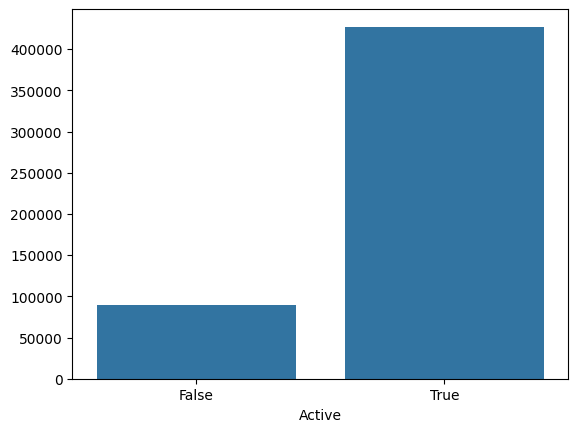

In [ ]:

sns.barplot(x=optin_counts.index, y=optin_counts.values)
plt.xlabel('Active')
plt

In [ ]:
resume_counts = df1['resume_uploaded'].value_counts()
resume_counts

,count
resume_uploaded,
True,415412
False,100918


In [ ]:
status_update_counts = df2['status_update'].value_counts()
status_update_counts

,count
status_update,
not interested,38327
interested,10419
declined,749
approved,688
awaiting,181


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

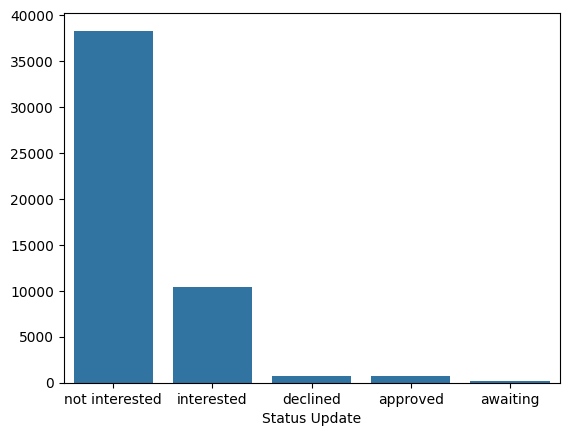

In [ ]:
sns.barplot(x=status_update_counts.index, y=status_update_counts.values)
plt.xlabel('Status Update')
plt

In [ ]:
resume_counts = df1['resume_uploaded'].value_counts()
resume_counts

,count
resume_uploaded,
True,415412
False,100918


In [ ]:
shorlist_country = df3['jt_country'].value_counts()
shorlist_country

KeyError: 'jt_country'

In [ ]:
df4 = pd.merge(df1, df2, on='user_id')
df4

In [ ]:
df5 = pd.merge(df4, df3,  left_on='school_id_y', right_on='school_id')
df5

In [ ]:
shortlist_country = df5.groupby('jt_country')['status_update'].count()
shortlist_country

In [ ]:
shortlist_size =  df2.groupby('shortlist_id')['user_id'].count()
shortlist_size

,user_id
shortlist_id,
000344c1-dfb0-4206-8354-e80530b4ed2a,3
0009ad2b-9b3d-45ad-99b8-4f2f515b455e,20
0018890a-f697-4661-94df-dc147c7b8dc7,14
00215f01-6261-4620-91d3-199b3666d79d,1
00271d38-84bd-4a1d-b140-ef892ce08a52,2
...,...
ffb8c64f-a9a7-4b58-9166-f4ef91ece774,4
ffbe42c0-7ec5-44e1-a3fd-7dae9a1813b9,20
ffd541b2-7671-4172-b865-8a8bc1cddd1d,21


Text(0.5, 1.0, 'Distribución del Tamaño de las Shortlists')

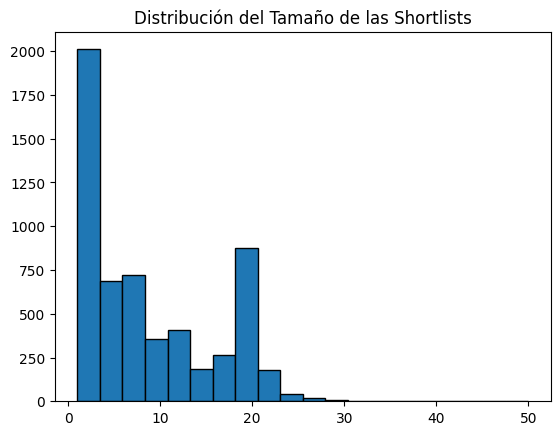

In [ ]:
plt.hist(shortlist_size, bins=20, edgecolor='black')
plt.title('Distribución del Tamaño de las Shortlists')

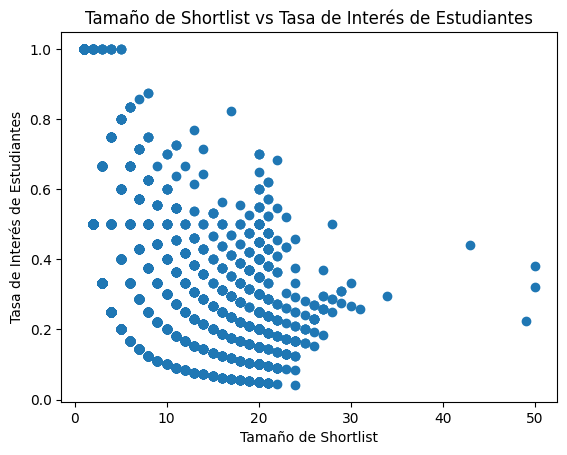

In [ ]:
# Filtrar los estudiantes interesados
interested_students = df2[df2['status_update'] == 'interested']

# Calcular la tasa de interés (porcentaje de estudiantes interesados) por cada shortlist
interest_rate = interested_students.groupby('shortlist_id')['user_id'].count() / shortlist_size

# Gráfico de dispersión entre el tamaño de la shortlist y la tasa de interés
plt.scatter(shortlist_size, interest_rate)
plt.title('Tamaño de Shortlist vs Tasa de Interés de Estudiantes')
plt.xlabel('Tamaño de Shortlist')
plt.ylabel('Tasa de Interés de Estudiantes')
plt.show()


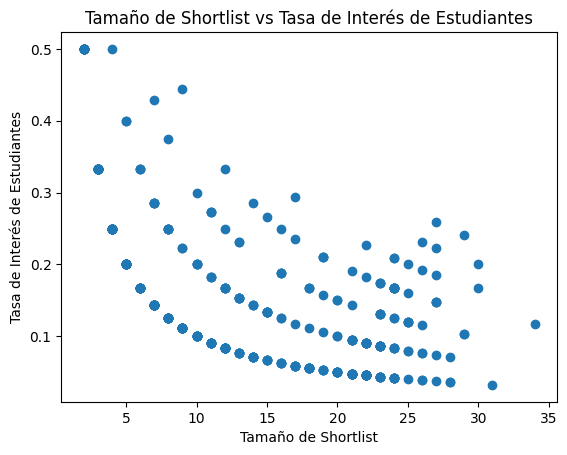

In [ ]:
# Filtrar los estudiantes interesados
interested_students = df2[df2['status_update'] == 'interested']

# Calcular la tasa de interés (porcentaje de estudiantes interesados) por cada shortlist
interest_rate = interested_students.groupby('shortlist_id')['user_id'].count() / shortlist_size

# Gráfico de dispersión entre el tamaño de la shortlist y la tasa de interés
plt.scatter(shortlist_size, interest_rate)
plt.title('Tamaño de Shortlist vs Tasa de Interés de Estudiantes')
plt.xlabel('Tamaño de Shortlist')
plt.ylabel('Tasa de Interés de Estudiantes')
plt.show()


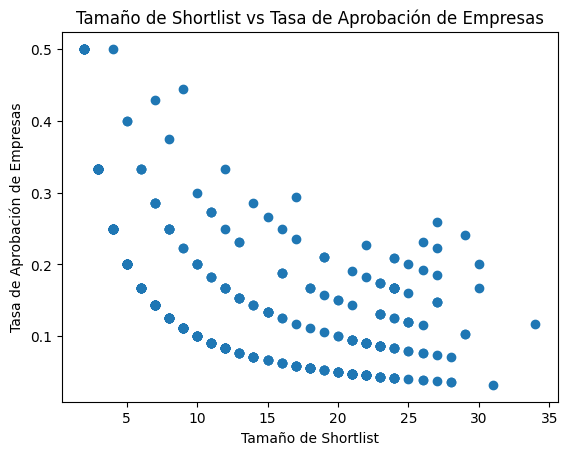

In [ ]:
shortlist_size = df2.groupby('shortlist_id')['user_id'].count()

# Filtrar los estudiantes aprobados por las empresas
approved_students = df2[df2['status_update'] == 'approved']

# Calcular la tasa de aprobación (porcentaje de estudiantes aprobados) por cada shortlist
approval_rate = approved_students.groupby('shortlist_id')['user_id'].count() / shortlist_size

# Gráfico de dispersión entre el tamaño de la shortlist y la tasa de aprobación
plt.scatter(shortlist_size, approval_rate)
plt.title('Tamaño de Shortlist vs Tasa de Aprobación de Empresas')
plt.xlabel('Tamaño de Shortlist')
plt.ylabel('Tasa de Aprobación de Empresas')
plt.show()


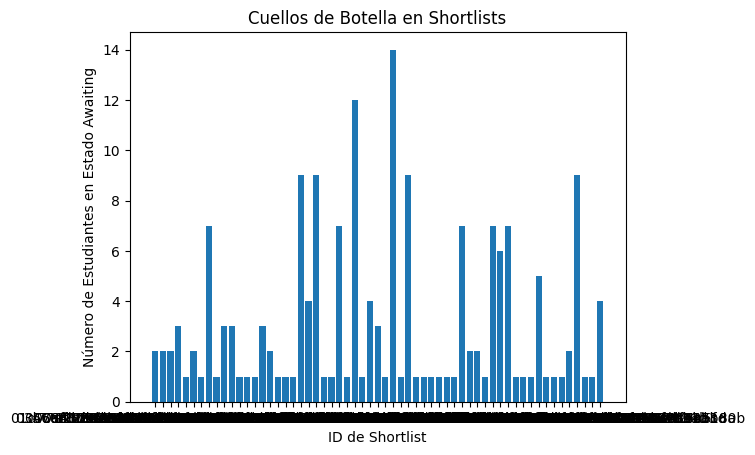

In [ ]:
# Filtrar las listas cortas que no logran completar el proceso (sin respuestas o no interesados)
bottleneck_shortlists = df2[df2['status_update'] == 'awaiting'].groupby('shortlist_id')['user_id'].count()

# Gráfico de barras para ver las listas que tienen cuellos de botella
plt.bar(bottleneck_shortlists.index, bottleneck_shortlists.values)
plt.title('Cuellos de Botella en Shortlists')
plt.xlabel('ID de Shortlist')
plt.ylabel('Número de Estudiantes en Estado Awaiting')
plt.show()


<ipython-input-61-de2e2f4c72fd>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['response_type'] = df2['status_update'].apply(lambda x: 'Interested' if x == 'interested' else 'Not Interested')


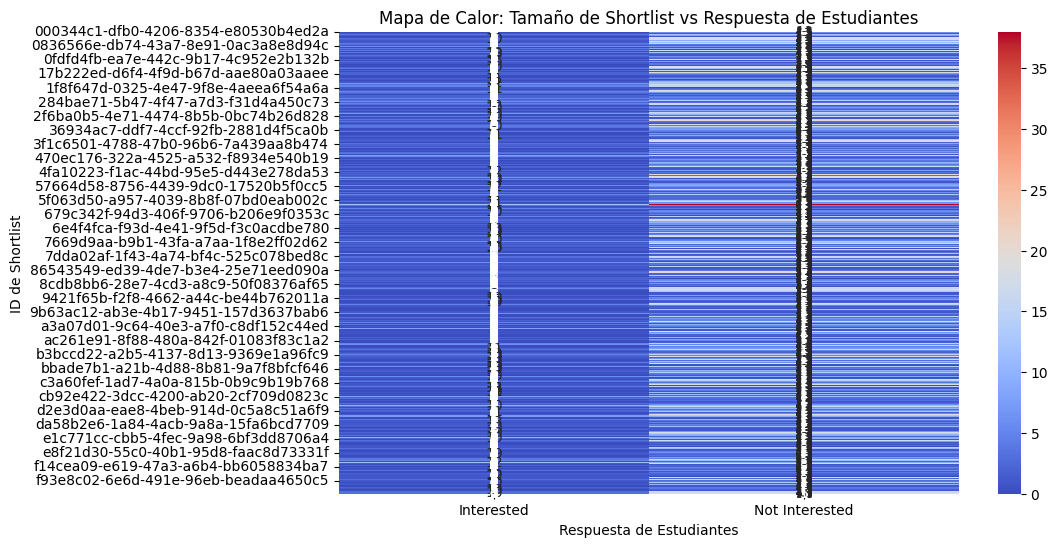

In [ ]:
import seaborn as sns

# Calcular la tasa de respuesta de estudiantes (interesado vs no interesado) por tamaño de la shortlist
df2['response_type'] = df2['status_update'].apply(lambda x: 'Interested' if x == 'interested' else 'Not Interested')
shortlist_size_response = df2.groupby(['shortlist_id', 'response_type']).size().unstack().fillna(0)

# Crear el heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(shortlist_size_response, cmap="coolwarm", annot=True, fmt=".0f")
plt.title('Mapa de Calor: Tamaño de Shortlist vs Respuesta de Estudiantes')
plt.xlabel('Respuesta de Estudiantes')
plt.ylabel('ID de Shortlist')
plt.show()


<ipython-input-62-2e71a5d9b0ed>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['shortlist_size_range'] = pd.cut(shortlist_size, bins=[1, 5, 10, 15, 20, 25], labels=['1-5', '6-10', '11-15', '16-20', '21-25'])


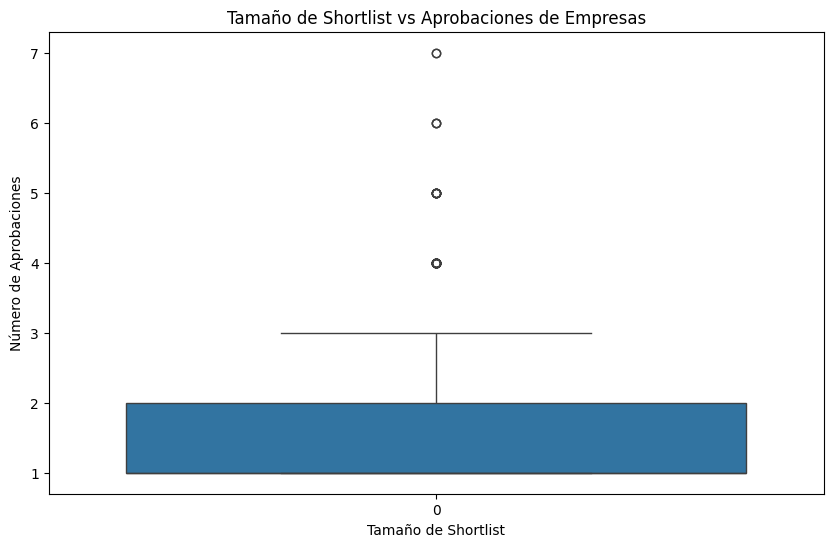

In [ ]:
# Crear rangos de tamaños de shortlists
df2['shortlist_size_range'] = pd.cut(shortlist_size, bins=[1, 5, 10, 15, 20, 25], labels=['1-5', '6-10', '11-15', '16-20', '21-25'])

# Filtrar los datos de estudiantes aprobados por empresas
approved_students = df2[df2['status_update'] == 'approved']

# Crear el boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='shortlist_size_range', y='user_id', data=approved_students.groupby('shortlist_id').count().reset_index())
plt.title('Tamaño de Shortlist vs Aprobaciones de Empresas')
plt.xlabel('Tamaño de Shortlist')
plt.ylabel('Número de Aprobaciones')
plt.show()


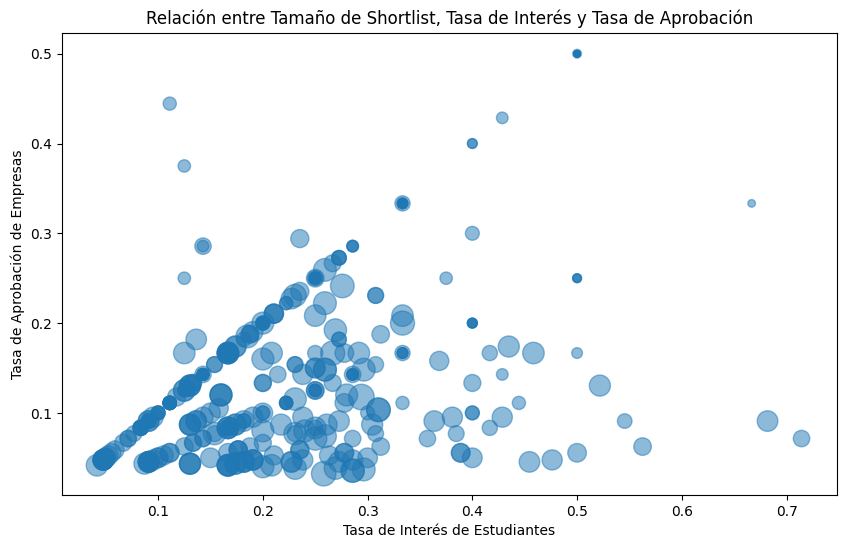

In [ ]:
# Calcular la tasa de interés y la tasa de aprobación por cada shortlist
interest_rate = interested_students.groupby('shortlist_id')['user_id'].count() / shortlist_size
approval_rate = approved_students.groupby('shortlist_id')['user_id'].count() / shortlist_size

# Crear el gráfico de burbujas
plt.figure(figsize=(10, 6))
plt.scatter(interest_rate, approval_rate, s=shortlist_size*10, alpha=0.5)
plt.title('Relación entre Tamaño de Shortlist, Tasa de Interés y Tasa de Aprobación')
plt.xlabel('Tasa de Interés de Estudiantes')
plt.ylabel('Tasa de Aprobación de Empresas')
plt.show()


<ipython-input-66-435ad3b07aa7>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  response_status_counts = df2.groupby(['shortlist_size_range', 'status_update']).size().unstack().fillna(0)


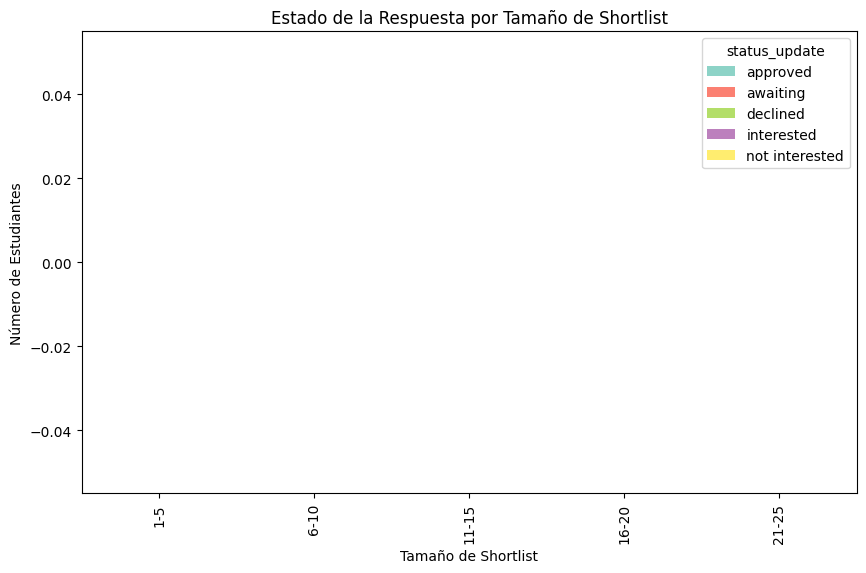

In [ ]:
# Crear una tabla de conteo de estados de respuesta por rango de tamaño de shortlist
response_status_counts = df2.groupby(['shortlist_size_range', 'status_update']).size().unstack().fillna(0)

# Crear el gráfico de barras apiladas
response_status_counts.plot(kind='bar', stacked=True, figsize=(10, 6), colormap="Set3")
plt.title('Estado de la Respuesta por Tamaño de Shortlist')
plt.xlabel('Tamaño de Shortlist')
plt.ylabel('Número de Estudiantes')
plt.show()


In [ ]:
df2

,user_id,receive_time,shortlist_id,status_update,cause,school_id,current_sign_in_at,time_to_approval,response_time,response_type,shortlist_size_range
0,7d7ea4ca-60b3-46a4-b285-499d5922cff5,2019-10-03 16:41:00+00:00,878c2098-626c-4818-9215-d449ccccd46b,awaiting,auto-creation,0101b57f-8f24-4741-81f6-b72fa5935248,2019-09-13 11:55:00+00:00,NaN,NaN,Not Interested,NaN
1,96219492-f7b5-45e1-b529-57c8432850e8,2019-10-01 15:17:00+00:00,8a37ed37-b9c5-4a54-8686-e578bf3ebeed,awaiting,auto-creation,0101b57f-8f24-4741-81f6-b72fa5935248,2020-06-15 15:32:00+00:00,NaN,NaN,Not Interested,NaN
2,c8fbaee9-4506-44e7-bb59-b6eb80a023ed,2019-08-26 11:41:00+00:00,c3de8641-56e3-416d-8cdd-f06db256784c,awaiting,auto-creation,0269f3bb-2cae-4751-92c0-b6c0522a6d84,2020-10-29 10:28:00+00:00,NaN,NaN,Not Interested,NaN
3,c8fbaee9-4506-44e7-bb59-b6eb80a023ed,2019-09-04 08:31:00+00:00,f3b417fe-eea4-4a94-939d-0a270d0dd86d,awaiting,auto-creation,0269f3bb-2cae-4751-92c0-b6c0522a6d84,2020-10-29 10:28:00+00:00,NaN,NaN,Not Interested,NaN
4,c8fbaee9-4506-44e7-bb59-b6eb80a023ed,2019-09-30 17:38:00+00:00,a61cf763-52c6-400a-999d-f807772fa3b2,awaiting,auto-creation,0269f3bb-2cae-4751-92c0-b6c0522a6d84,2020-10-29 10:28:00+00:00,NaN,NaN,Not Interested,NaN
...,...,...,...,...,...,...,...,...,...,...,...
50390,e2c93e64-dfa3-4b18-a8d1-296d26848cb7,2020-09-02 09:23:00+00:00,3ecbb71a-38fb-4f70-be0d-c4859a96f6aa,not interested,auto-timeout,ffebf613-0961-44d2-bd87-f9c3b1f5ed51,2020-09-10 09:28:00+00:00,NaN,NaN,Not Interested,NaN
50391,e5806434-277a-4bbb-9a96-d3db32e7de00,2020-07-09 16:01:00+00:00,45f5b639-a468-4a42-8c5d-9b1116aa3a42,not interested,auto-timeout,ffebf613-0961-44d2-bd87-f9c3b1f5ed51,2020-05-11 09:19:00+00:00,NaN,NaN,Not Interested,NaN
50392,ed363d12-a88c-46b1-b6e8-b9b6b4b0322e,2020-03-20 09:08:00+00:00,1fd7c5dd-bdef-49e5-96dd-da30b58f1cd7,not interested,auto-timeout,ffebf613-0961-44d2-bd87-f9c3b1f5ed51,2019-12-04 14:48:00+00:00,NaN,NaN,Not Interested,NaN
50393,ed363d12-a88c-46b1-b6e8-b9b6b4b0322e,2020-03-19 15:38:00+00:00,2a2bcef8-f163-478c-96b6-4397ad326465,not interested,auto-timeout,ffebf613-0961-44d2-bd87-f9c3b1f5ed51,2019-12-04 14:48:00+00:00,NaN,NaN,Not Interested,NaN


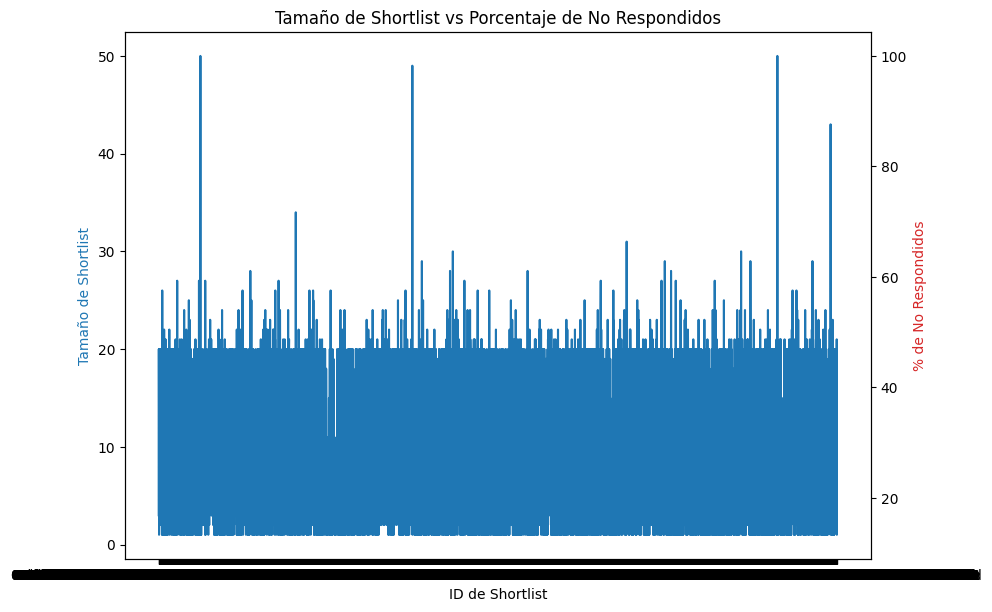

In [ ]:
# Calcular el porcentaje de no respondidos por shortlist
no_response_rate = df2[df2['status_update'] == 'awaiting'].groupby('shortlist_id')['user_id'].count() / shortlist_size

fig, ax1 = plt.subplots(figsize=(10, 6))

# Tamaño de Shortlist
ax1.set_xlabel('ID de Shortlist')
ax1.set_ylabel('Tamaño de Shortlist', color='tab:blue')
ax1.plot(shortlist_size.index, shortlist_size.values, color='tab:blue', label='Tamaño de Shortlist')

# Porcentaje de No Respondidos
ax2 = ax1.twinx()
ax2.set_ylabel('% de No Respondidos', color='tab:red')
ax2.plot(no_response_rate.index, no_response_rate.values * 100, color='tab:red', label='% de No Respondidos')

fig.tight_layout()
plt.title('Tamaño de Shortlist vs Porcentaje de No Respondidos')
plt.show()


In [ ]:
shortlist_size.describe()

In [ ]:
approved_students = df2[df2['status_update'] == 'approved']
approved_students

In [ ]:
approval_rate = approved_students.groupby('shortlist_id')['user_id'].count() / df2.groupby('shortlist_id')['user_id'].count() * 100
approval_rate

In [ ]:
approval_rate = approved_students.groupby('shortlist_id')['user_id'].count() / shortlist_size


In [ ]:
plt.scatter(shortlist_size, approval_rate)
plt.title('Tamaño de Shortlist vs Tasa de Aprobación de Empresas')

In [ ]:
shortlist_size = df2['shortlist_id'].value_counts()
shortlist_size

In [ ]:
#ver numero de approved agrupadps por shortlist_id
approved_students = df2[df2['status_update'] == 'approved']
approved_count = approved_students.groupby('shortlist_id').size().reset_index(name='approved_count')
approved_count.sort_values(by='approved_count', ascending=False)

In [ ]:
approved_count[approved_count['approved_count'] > 1]

In [ ]:
# Filtrar los estudiantes con estados 'interested' y 'declined'
interested_declined_students = df2[df2['status_update'].isin(['interested', 'declined'])]

# Agrupar por 'shortlist_id' y contar los estados
shortlist_status_counts = interested_declined_students.groupby('shortlist_id')['status_update'].value_counts().unstack(fill_value=0)

# Filtrar los 'shortlist_id' que no tienen estudiantes aprobados
shortlist_without_approved = shortlist_status_counts[shortlist_status_counts.sum(axis=1) == (shortlist_status_counts['interested'] + shortlist_status_counts['declined'])]

# Mostrar el resultado
print(shortlist_without_approved)


In [ ]:
# Agrupar por 'shortlist_id' y contar los estados
status_counts = df2[df2['status_update'].isin(['approved', 'interested', 'declined'])].groupby('shortlist_id')['status_update'].value_counts().unstack(fill_value=0)

# Renombrar las columnas para mayor claridad
status_counts.columns.name = None  # Eliminar el nombre de la columna
status_counts.reset_index(inplace=True)  # Restablecer el índice para convertir 'shortlist_id' en columna

# Mostrar el resultado
print(status_counts)


In [ ]:
#sumar columna approved_count
approved_count['approved_count'].sum()

In [ ]:
df1[df1['user_id'] == '8bbac6c4-e400-4950-9e67-0e66dd183c94']

In [ ]:
# Shortlist de los usarios interesados
df2[df2['status_update'] == 'interested'].groupby(['shortlist_id']).count().sort_values(by = 'user_id',ascending=False)

In [ ]:
df2[df2['status_update'] == 'interested'].groupby(['shortlist_id'])['user_id'].value_counts(normalize=True)

In [ ]:
len(df2[df2['shortlist_id'] == '100cd0c8-7ab7-48f2-9b6b-d738fb0d1e56']['user_id'].unique())

In [ ]:
df2[df2['shortlist_id'] == 'ffd541b2-7671-4172-b865-8a8bc1cddd1d'].sort_values(by='user_id')

In [ ]:
df2[df2['shortlist_id'] == '339aac3b-61bf-4639-8460-2aa13f66e0cb'].sort_values(by='user_id')

In [ ]:
df2[df2['shortlist_id'] == '100cd0c8-7ab7-48f2-9b6b-d738fb0d1e56'].sort_values(by='user_id')

In [ ]:
user_counts_per_shortlist = df2.groupby(['shortlist_id', 'user_id']).size().reset_index(name='count')
repeated_users = user_counts_per_shortlist[user_counts_per_shortlist['count'] > 1]
num_repeated_users = len(repeated_users)
num_repeated_users